# Final Project 

By : Priyank Sai Pannem (XR97612)
     Bhanu Sri Somani ( GN38499)
 
Professor: Mehmet Sarica

Datasets : https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv
           https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_train.csv

The main objective of this project is to create a sentiment forecasting model for movie reviews. We have two datasets containing favorable and negative comments, and our goal is to develop a machine learning model that can accurately predict the sentiment expressed in these reviews. By achieving this objective, we aim to gain insights into audience reactions and opinions towards movies, which can be valuable for decision-making in the film industry.

In [1]:
import pandas as pd
import numpy as np

X = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_train.csv')
y = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_train.csv')

In [2]:
df = pd.concat([X,y],axis=1)
df.head()

,review,sentiment
0,"Shame, is a Swedish film in Swedish with Engli...",1
1,I know it's rather unfair to comment on a movi...,0
2,"""Bread"" very sharply skewers the conventions o...",1
3,After reading tons of good reviews about this ...,1
4,During the Civil war a wounded union soldier h...,1


# Data Cleaning

### Function to remove html tags

In [3]:
import re
from bs4 import BeautifulSoup

def clean(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    cleaned_text = cleaned_text.lower()
    return re.sub(r'[^\w\s]','',cleaned_text)
X['review'] = X['review'].apply(clean)
X['review']

C:\Users\priya\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


0        shame is a swedish film in swedish with englis...
1        i know its rather unfair to comment on a movie...
2        bread very sharply skewers the conventions of ...
3        after reading tons of good reviews about this ...
4        during the civil war a wounded union soldier h...
                               ...                        
39995    as a pagan i must say this movie has little if...
39996    a lot of the comments seem to treat this film ...
39997    ive only seen most of the series since i leave...
39998    the all i have is 5 dollars and my wedding rin...
39999    when king kong stripped her of her top in the ...
Name: review, Length: 40000, dtype: object

The code takes a piece of text, which is assumed to contain HTML tags, and performs several operations to clean it. It removes the HTML tags, converts the text to lowercase, and removes any non-alphanumeric characters (except spaces). The resulting cleaned text is then assigned back to the 'review' column of the 'X' DataFrame. 

### Function to remove stop words

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords_list = set(stopwords.words('english'))

# Define a function to remove stopwords from a text
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    return ' '.join(filtered_tokens)

X['review'] = X['review'].apply(remove_stopwords)
X['review']

0        shame swedish film swedish english subtitles f...
1        know rather unfair comment movie without seein...
2        bread sharply skewers conventions horror movie...
3        reading tons good reviews movie decided take s...
4        civil war wounded union soldier hides isolated...
                               ...                        
39995    pagan must say movie little magickal significa...
39996    lot comments seem treat film baseball movie fe...
39997    ive seen series since leave tv background nois...
39998    5 dollars wedding ring scene riot also guffawe...
39999    king kong stripped top 1976 remake breathless ...
Name: review, Length: 40000, dtype: object

Stopwords are eliminated from the'review' column of the 'X' DataFrame using the aforementioned code. Stopwords are frequent words in the English language that have little to no meaning, such "the," "is," and "a." The code breaks the text into tokens, examines each token to see if it is a stopword, and then filters out the stopwords. The DataFrame's'review' column is then given a new assignment for the output text.

## Function to convert text into root words

In [5]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a text
def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization to the 'text' column
X['review'] = X['review'].apply(lemmatize_text)
X['review']

0        shame swedish film swedish english subtitle fi...
1        know rather unfair comment movie without seein...
2        bread sharply skewer convention horror movie g...
3        reading ton good review movie decided take spi...
4        civil war wounded union soldier hide isolated ...
                               ...                        
39995    pagan must say movie little magickal significa...
39996    lot comment seem treat film baseball movie fee...
39997    ive seen series since leave tv background nois...
39998    5 dollar wedding ring scene riot also guffawed...
39999    king kong stripped top 1976 remake breathless ...
Name: review, Length: 40000, dtype: object

The above code takes the 'review' column in the 'X' DataFrame, breaks the text into individual words, and converts those words to their base or dictionary form using lemmatization. The lemmatized words are then combined back into a single string and stored in the 'review' column.

## Converting text into numerical format

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_processed = vectorizer.fit_transform(X['review'])

The code uses the TfidfVectorizer to convert the text in the 'review' column of the DataFrame 'X' into numerical features. It calculates the TF-IDF scores for each word in each review, which measure the importance of a word in a particular review relative to its frequency across all reviews. The resulting 'X_processed' matrix contains these transformed features, ready for further analysis or modeling.

# Elbow plot to find optimal number of clusters

In [7]:
# from sklearn.cluster import KMeans

# distortions = list()

# for i in range(20, 50):
#     print('Iteration:',i)
#     km = KMeans(n_clusters=i, random_state=0)
#     km = km.fit(X_train_processed)
#     distortions.append(km.inertia_)
    
# plt.plot(range(20, 50), distortions, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.show()

On the preprocessed data, the aforementioned code applies the K-means clustering method. The distortion value is calculated for each iteration when fitting the KMeans model over a range of cluster numbers. The best number of clusters is then chosen based on the "elbow point" in the plot and the consequent distortion values.
Running the above code We got optimal number of clusters as 40.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(32000, 180881)

In [10]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

# Normalize the TF-IDF vectors
normalized_vectors = normalize(X_train)

# Choose the number of clusters (k)
k = 40

# Apply k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(normalized_vectors)

# Get the cluster labels for each document
cluster_labels = kmeans.labels_

# Get the cluster centroids
cluster_centroids = kmeans.cluster_centers_

The normalized TF-IDF vectors are subjected to k-means clustering in the code above. Each document is given a cluster, and the centroid (average vector) of each cluster is calculated. The cluster centroids provide the typical TF-IDF vector for each cluster, while the cluster labels specify which cluster each document belongs to.

In [11]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=2).fit(X_train)

# Get the indices of the two nearest points to each centroid
_, indices = nbrs.kneighbors(cluster_centroids)
actual_idx = indices.flatten()
actual_idx

array([ 9462,   964, 18155,  3549, 29145, 25503, 17561,    48, 19412,
       16706, 13074,  8109, 11458,  8013, 22304, 26971, 23621, 14264,
        9748, 13181, 23248,  3012,  5202,  2458,  3549, 18155, 19412,
       16706, 28751, 13500,  1457, 26770, 18155,  3549, 15086,  3883,
       12881,  5065, 11313,  9620,  4931, 26710,  1729,   335, 26000,
        3210, 16827, 12233,  8196,  8835,  6593, 29453,  3755, 19656,
         122,  8853, 26000, 16551, 16367, 27998, 20439, 19570,  5769,
        5998, 16393, 30240, 11582, 31652, 26022, 20578,  1457, 23098,
       13895,  1946, 31687, 13595,  9125,  9309,  5581, 14045],
      dtype=int64)

The NearestNeighbors technique is used in the code above to determine the two locations that are closest to the centroid of each cluster. You may locate the precise data points connected to each centroid by using these indices, which describe the locations of the closest points in the original dataset.

In [22]:
actual_idx.shape

(80,)

<b> Sanity check <b/>
- For every cluster we took 2 nearest neighbours. Since there are 40 clusters in total, the total number of labeled records are 80 

In [12]:
# mapping_df = pd.DataFrame()
# mapping_df['Cluster'] = cluster_labels[actual_idx]
# mapping_df['Sentiment'] =  y_train.iloc[actual_idx]['sentiment'].values
# mapping_df

In [13]:
X_labeled = X_train[actual_idx]
y_labeled = y_train.iloc[actual_idx]['sentiment']

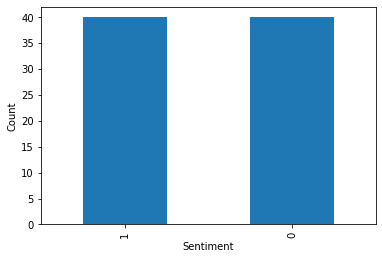

In [14]:
import matplotlib.pyplot as plt

y_labeled.value_counts().plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

The aforementioned code generates a bar plot that displays the number of various emotion labels. The sentiment categories are shown on the x-axis, while the counts for each sentiment category are shown on the y-axis. The height of each vertical bar, which graphically represents each sentiment category, correlates to the number of that sentiment label. The figure makes it easier to see how the dataset's sentiment labels are distributed.
As, the from the above visulaisation now we know that data is un-biased hence the perfect metric to evaluate the model performance will be Accuracy.

In [15]:
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report

## Model 1: Logestic Regression 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipeline_lr = Pipeline([
    ('logistic', LogisticRegression())
])

# Define the parameter grid for grid search
param_grid_lr = {
    'logistic__C': [0.1, 1, 10, 20],
    'logistic__penalty': ['l2',]
}

# Create the grid search object
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5)

# Fit the grid search to the training data
grid_search_lr.fit(X_labeled, y_labeled)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print("Best parameters:", best_params_lr)
print("Best score:", best_score_lr)

# Make predictions on the test data using the best model
y_pred_lr = grid_search_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

Best parameters: {'logistic__C': 0.1, 'logistic__penalty': 'l2'}
Best score: 0.75
              precision    recall  f1-score   support

           0       0.84      0.17      0.28      3948
           1       0.54      0.97      0.70      4052

    accuracy                           0.57      8000
   macro avg       0.69      0.57      0.49      8000
weighted avg       0.69      0.57      0.49      8000



On the labeled training data, logistic regression with grid search is carried out using the code above. Cross-validation is used to find the optimal pairing of "C" (inverse of regularization strength) and "penalty" (kind of regularization) values. In order to assess the effectiveness of the model, a classification report is produced using the test data and the best model discovered by grid search.The accuracy is not upto to the expectations so let's try building RandomForest Classifier.

## Model 2: RandomForest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier())
])

# Define the parameter grid for grid search
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'rf__max_depth': [None, 5, 10],  # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Create the grid search object
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5)

# Fit the grid search to the training data
grid_search_rf.fit(X_labeled, y_labeled)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters:", best_params_rf)
print("Best score:", best_score_rf)

# Make predictions on the test data using the best model
y_pred_rf = grid_search_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Best parameters: {'rf__max_depth': 10, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best score: 0.7625
              precision    recall  f1-score   support

           0       0.82      0.11      0.19      3948
           1       0.53      0.98      0.69      4052

    accuracy                           0.55      8000
   macro avg       0.68      0.54      0.44      8000
weighted avg       0.68      0.55      0.44      8000



The code performs random forest classification with grid search on the labeled training data. It searches for the best combination of 'n_estimators' (number of trees), 'max_depth' (maximum depth of trees), and 'min_samples_split' (minimum samples to split) values using cross-validation. The best model found during grid search is used to make predictions on the test data, and a classification report is generated to evaluate the model's performance. 
There is not much change in the performance of decision tree than logistic Regression.
So let's try building SVC

## Model 3: SVM

In [21]:
from sklearn.svm import SVC

pipeline_svc = Pipeline([
    ('svm', SVC())
])

# Define the parameter grid for grid search
param_grid_svc = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
}

# Create the grid search object
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5)

# Fit the grid search to the training data
grid_search_svc.fit(X_labeled, y_labeled)

# Get the best parameters and best score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print("Best parameters:", best_params_svc)
print("Best score:", best_score_svc)

# Make predictions on the test data using the best model
y_pred_svc = grid_search_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

Best parameters: {'svm__C': 1, 'svm__kernel': 'rbf'}
Best score: 0.7375
              precision    recall  f1-score   support

           0       0.89      0.03      0.06      3948
           1       0.51      1.00      0.68      4052

    accuracy                           0.52      8000
   macro avg       0.70      0.51      0.37      8000
weighted avg       0.70      0.52      0.37      8000



The above code performs support vector machine classification with grid search on the labeled training data. It searches for the best combination of 'C' (regularization parameter) and 'kernel' (type of kernel function) values using cross-validation. The best model found during grid search is used to make predictions on the test data, and a classification report is generated to evaluate the model's performance. 
Comparing all the model's We have come to a conclusion that Logistic Regression performed better with higher accuracy with any other model.

## Testing the Best performed model on Production data

In [23]:
X_final = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/X_final.csv')
y_final = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final/y_final.csv')

X_final_processed = vectorizer.transform(X_final['review'])


y_pred = grid_search_lr.predict(X_final_processed)

The code applies the trained TF-IDF vectorizer and logistic regression model to make predictions on the final test dataset.

In [24]:
print(classification_report(y_final, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.96      0.01      0.03      5000
           1       0.50      1.00      0.67      5000

    accuracy                           0.51     10000
   macro avg       0.73      0.51      0.35     10000
weighted avg       0.73      0.51      0.35     10000



The code generates a classification report that provides insights into the performance of the classification model. It includes metrics like precision, recall, F1-score, and support for each class in the dataset. The zero_division parameter is used to handle cases where there might be a zero division error.

# Conclusion

From all the models we found that Logistic Regression Model performed the best with Accuracy of 57%. 